## Loading and Visualising the digits data

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The image data is a three dimentional array, lets visualize first hundred of these

In [3]:
import matplotlib.pyplot as plt

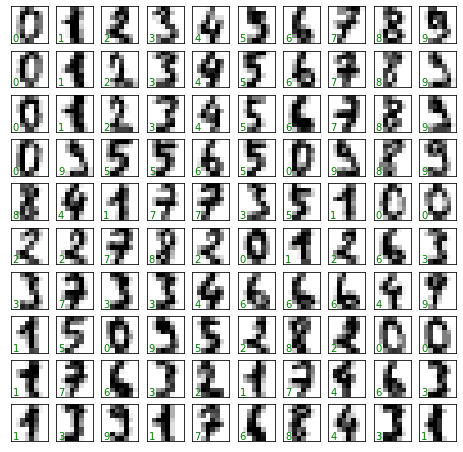

In [4]:
fig, axes = plt.subplots(10,10,figsize=(8,8),
                      subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [5]:
x = digits.data
x.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

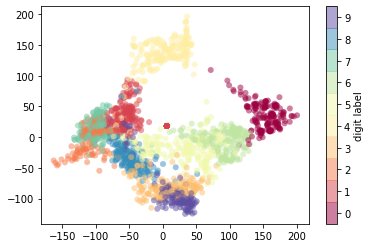

In [8]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);


### Classification on digits

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,random_state=0)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,Ytrain)
y_model = model.predict(Xtest)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,y_model)

0.8333333333333334

Plotting confusion metrics

Text(76.2, 0.5, 'True Value')

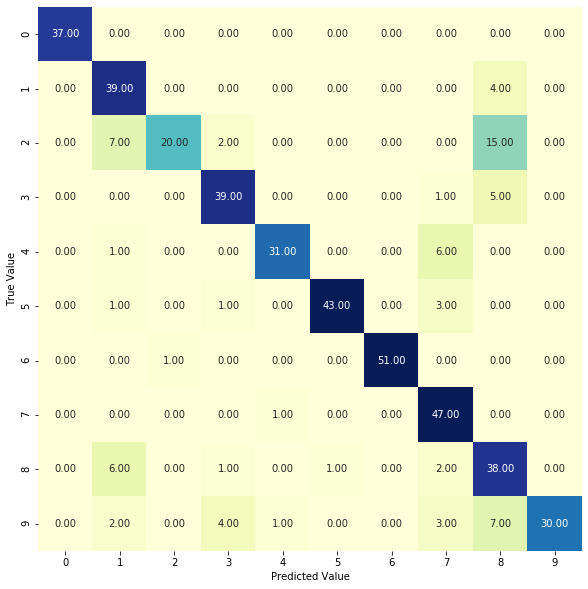

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plot

mat = confusion_matrix(Ytest,y_model)

fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(mat,annot=True,cmap='YlGnBu',square=True,cbar=False,robust=True,ax=ax,fmt='.2f')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

To gain more intution on the correctness of the results we are plotting the inputs

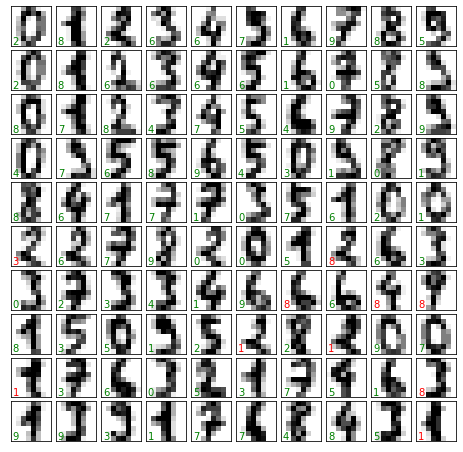

In [58]:
fig,axes = plt.subplots(10,10,figsize=(8,8),
                       subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (Ytest[i] == y_model[i])  else 'red')